# PROJECT BY KAVIDHA KRISHNAMOORTHI

# Load the Dataset

In [3]:
import pandas as pd
iris_data = pd.read_csv('iris/Iris.csv')
print(iris_data.head())



   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


# Preprocess the Data

In [4]:
iris_preprocessed = iris_data.drop(['Id', 'Species'], axis=1)
print(iris_preprocessed.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


# The Elbow Method

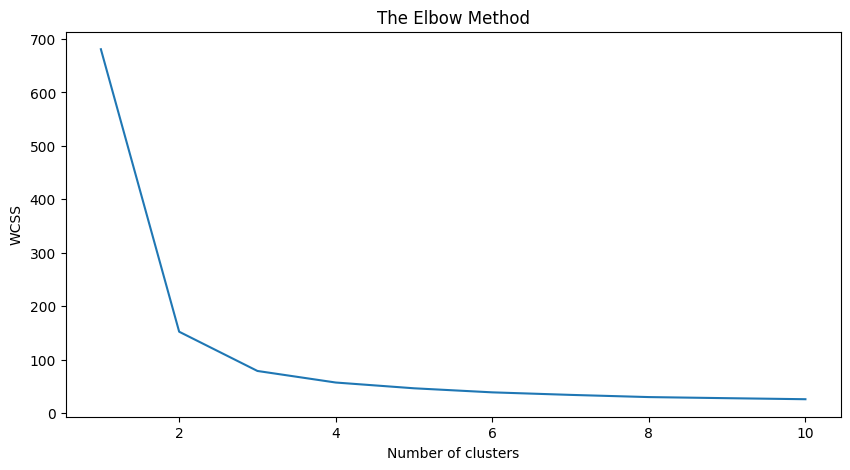

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
iris_data = pd.read_csv('iris/Iris.csv')

# Preprocess the data by removing 'Id' and 'Species' columns
iris_preprocessed = iris_data.drop(['Id', 'Species'], axis=1)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(iris_preprocessed)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within cluster sum of squares
plt.show()


# K-Means Clustering

In [7]:
from sklearn.cluster import KMeans


# Apply K-Means Clustering with the optimal number of clusters (3)
kmeans_optimal = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_optimal.fit(iris_preprocessed)

# Predicting the cluster labels
clusters = kmeans_optimal.predict(iris_preprocessed)

# Print the centroids of the clusters
print("Centroids of the clusters:")
print(kmeans_optimal.cluster_centers_)

# Print the first 10 predicted cluster labels
print("\nFirst 10 predicted cluster labels:")
print(clusters[:10])


Centroids of the clusters:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

First 10 predicted cluster labels:
[1 1 1 1 1 1 1 1 1 1]


#  Visualize the Clusters

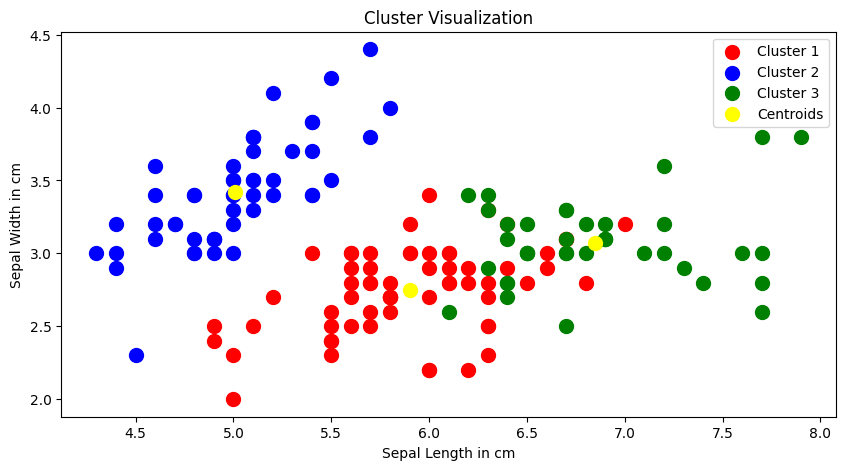

In [8]:
import matplotlib.pyplot as plt

# Plotting the clusters
plt.figure(figsize=(10,5))
plt.scatter(iris_preprocessed[clusters == 0]['SepalLengthCm'], iris_preprocessed[clusters == 0]['SepalWidthCm'], 
            s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris_preprocessed[clusters == 1]['SepalLengthCm'], iris_preprocessed[clusters == 1]['SepalWidthCm'], 
            s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris_preprocessed[clusters == 2]['SepalLengthCm'], iris_preprocessed[clusters == 2]['SepalWidthCm'],
            s = 100, c = 'green', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.title('Cluster Visualization')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.legend()
plt.show()
